In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [11]:
df = pd.read_csv('concrete_data.csv')
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [13]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [23]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Strength']),
                                                 df['Strength'],
                                                 test_size=0.2,
                                                 random_state=42)
X_train.shape,X_test.shape

((824, 8), (206, 8))

In [67]:
def plotColumns(X_train):
    for cols in X_train.columns:
        sns.displot(X_train[cols],kde=True)
    
        plt.figure(figsize=(12,5))
        plt.subplot(122)
        stats.probplot(X_train[cols],plot=plt)
        
        plt.show()

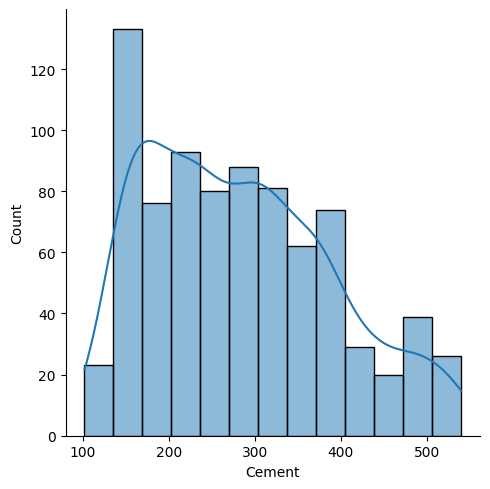

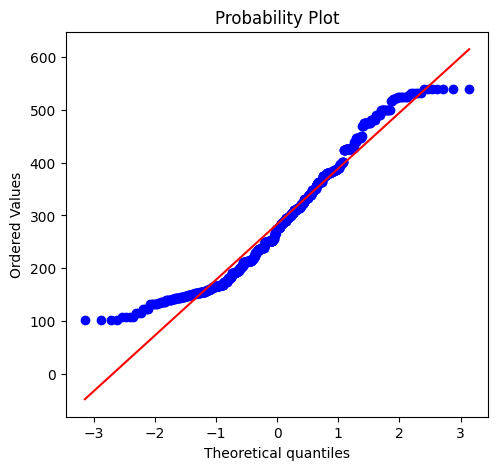

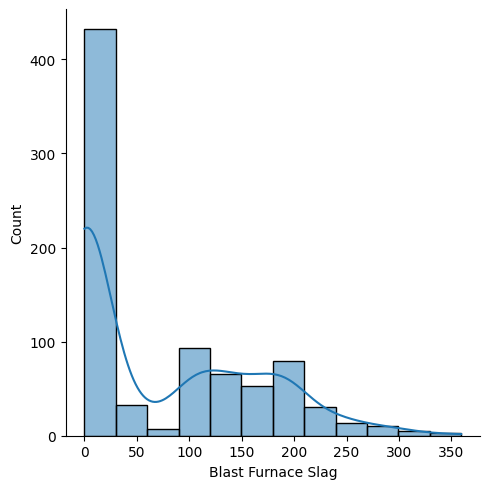

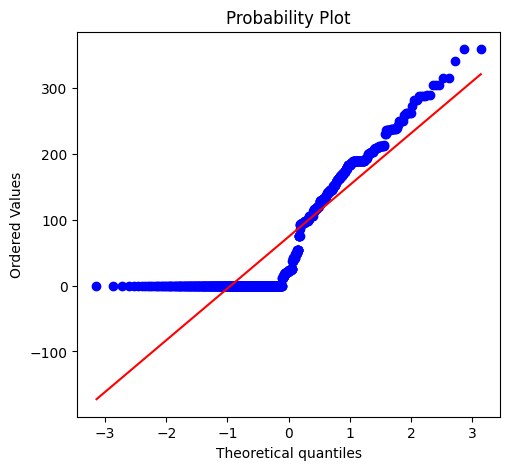

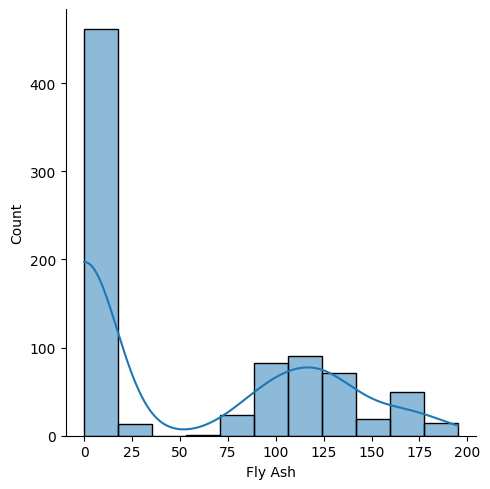

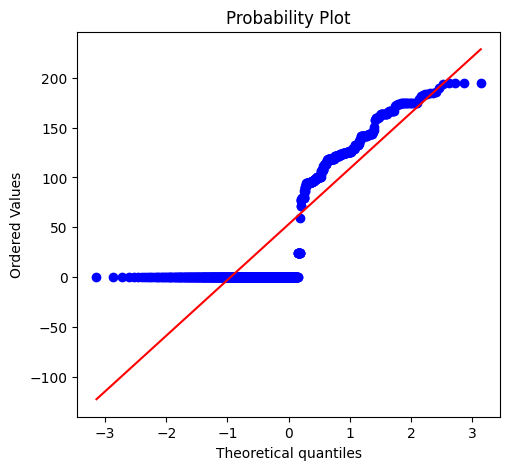

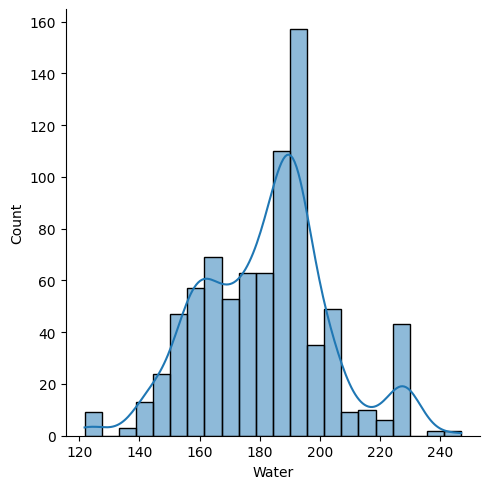

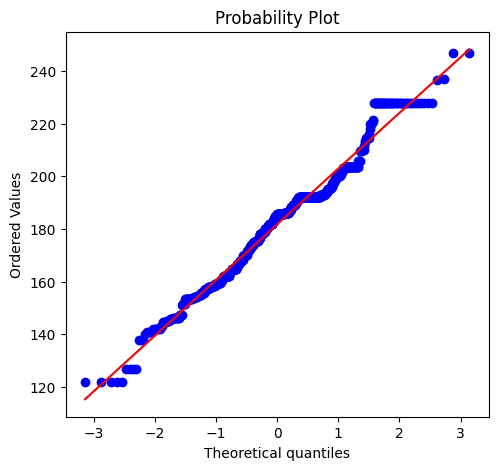

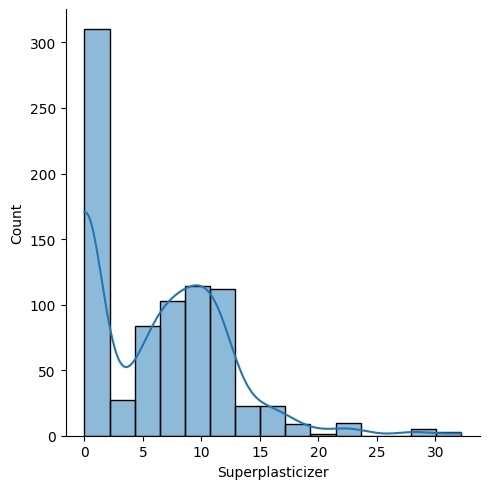

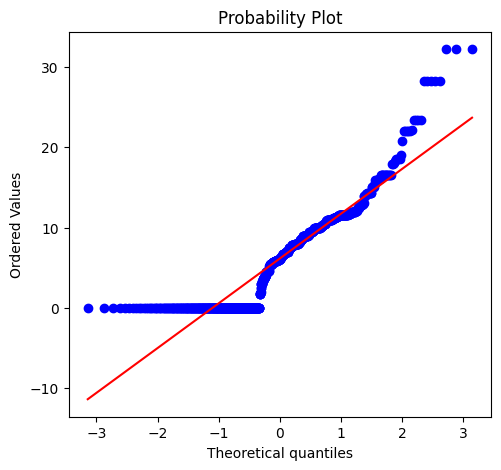

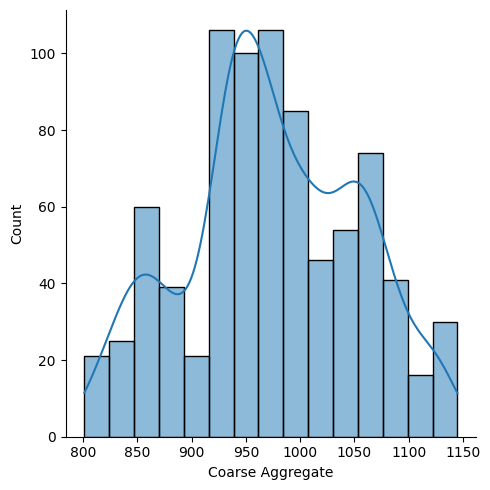

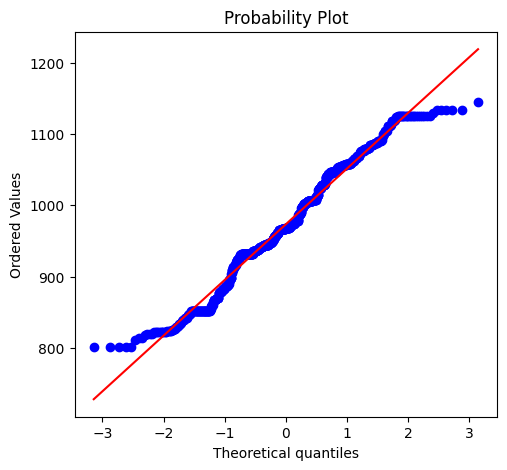

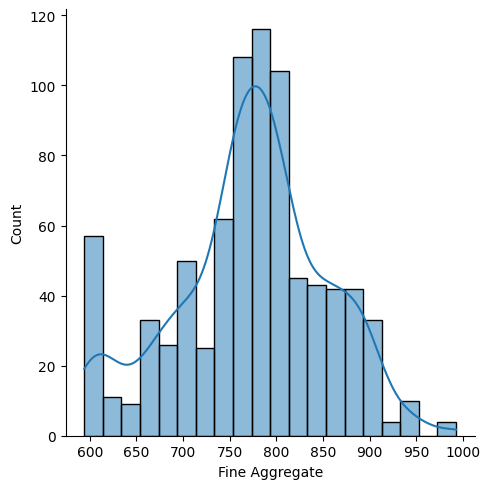

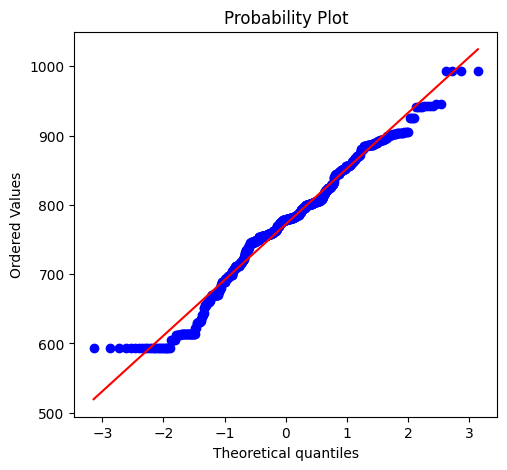

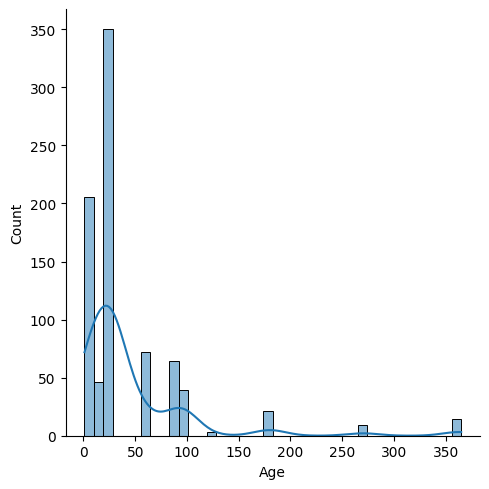

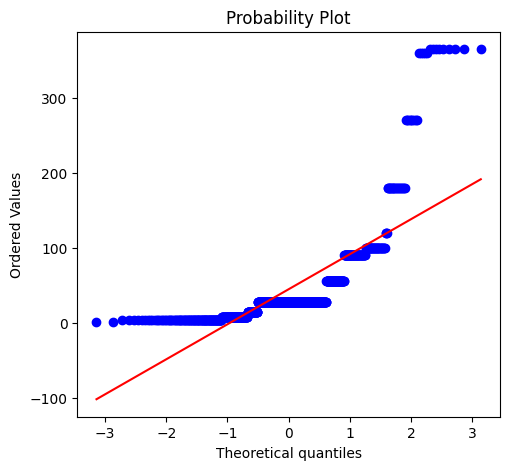

In [69]:
plotColumns(X_train)

In [85]:
def plotTransformColumns(X_train,transform):
    trf = PowerTransformer(method=transform)
    X_train_transform = pd.DataFrame(trf.fit_transform(X_train+0.00000001),columns=X_train.columns)
    for cols in X_train_transform.columns:
        sns.displot(X_train_transform[cols],kde=True)
    
        plt.figure(figsize=(12,5))
        plt.subplot(122)
        stats.probplot(X_train_transform[cols],plot=plt)
        
        plt.show()

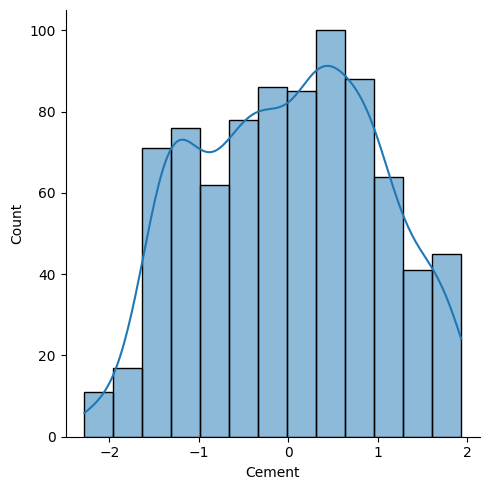

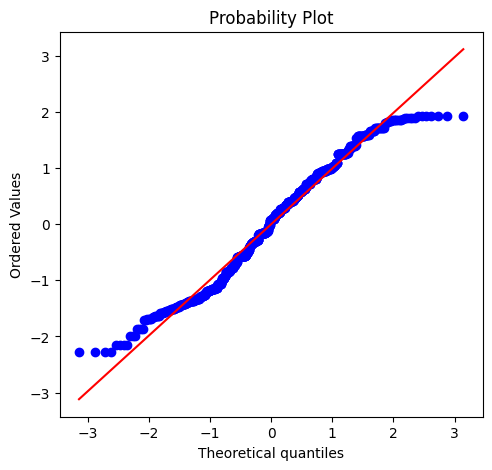

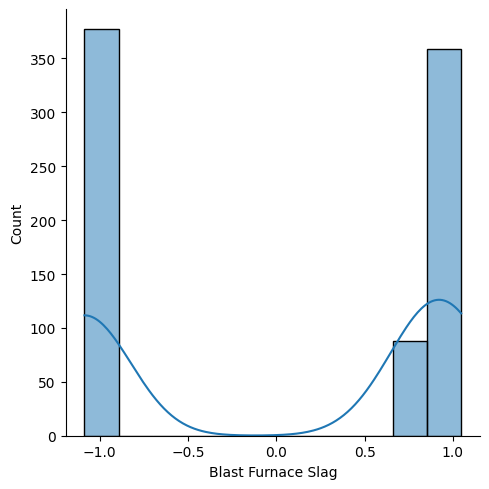

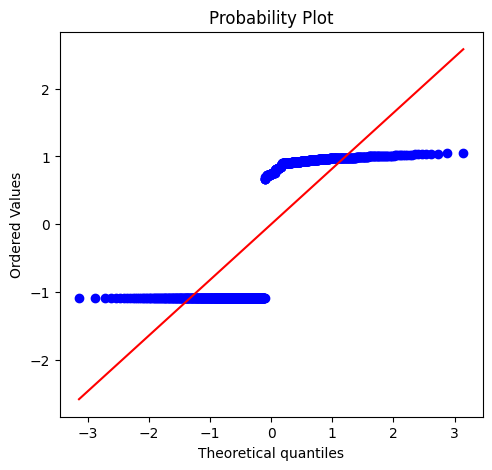

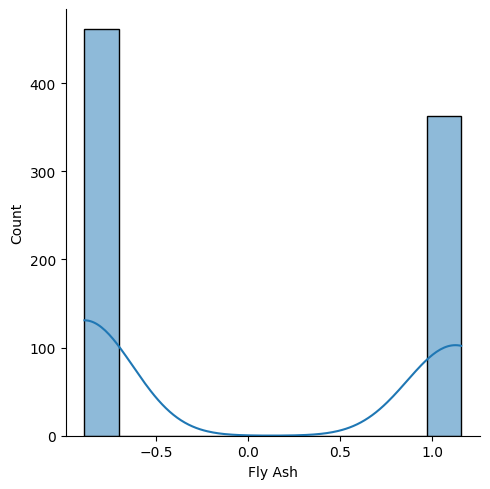

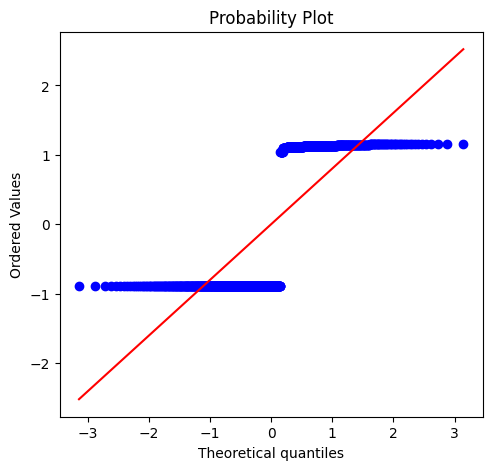

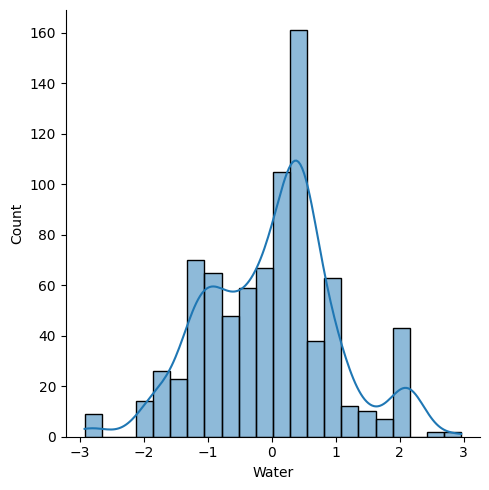

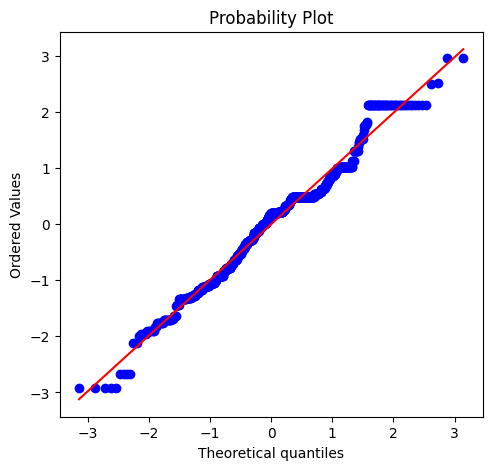

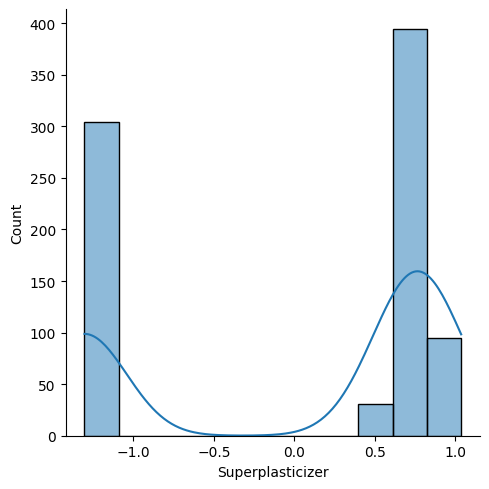

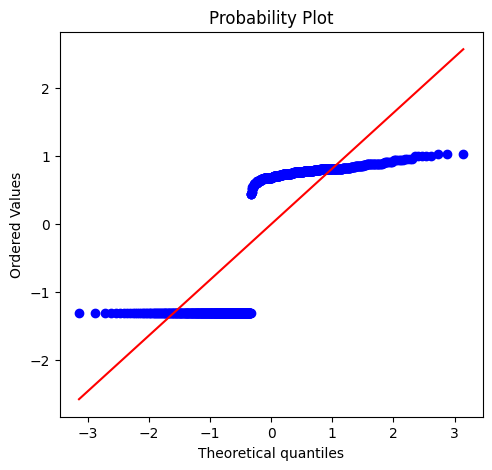

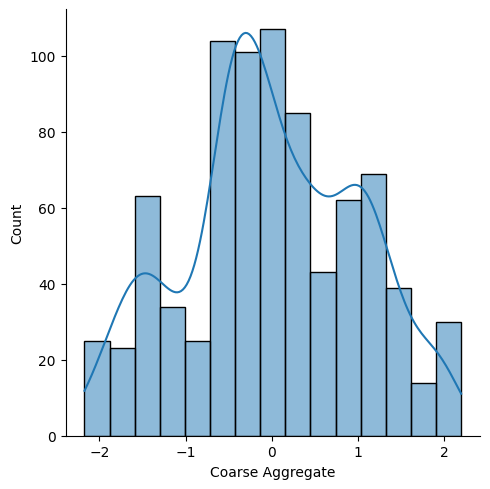

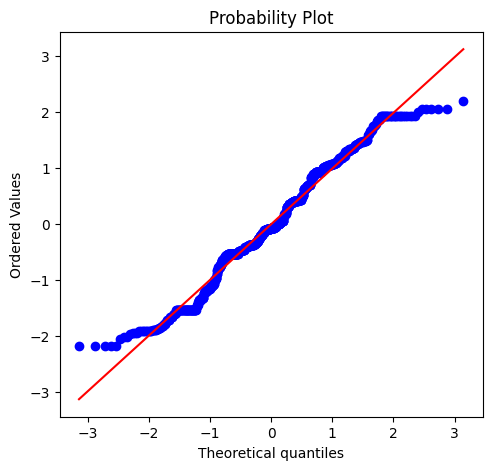

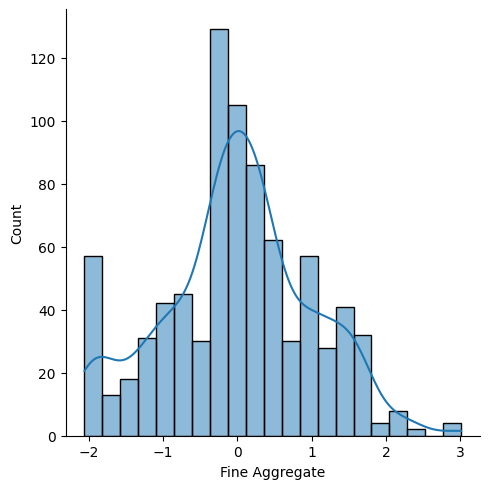

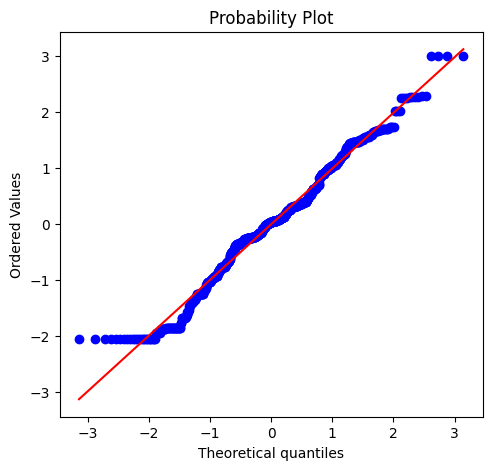

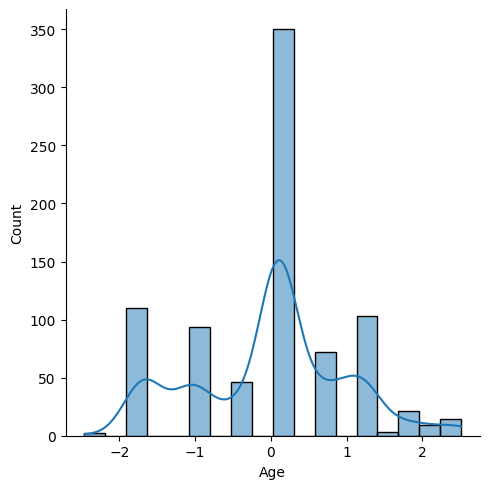

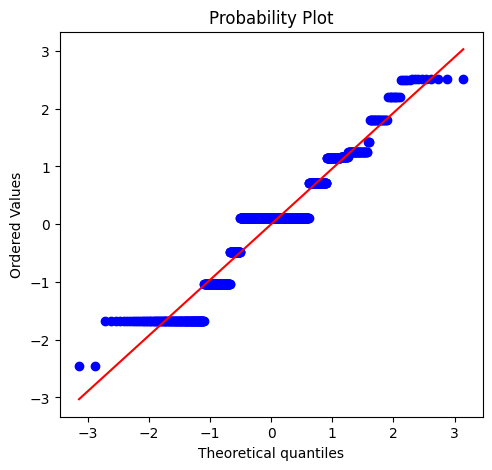

In [87]:
plotTransformColumns(X_train,'box-cox')

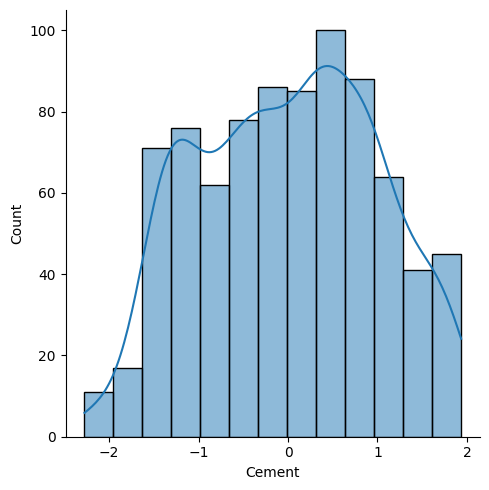

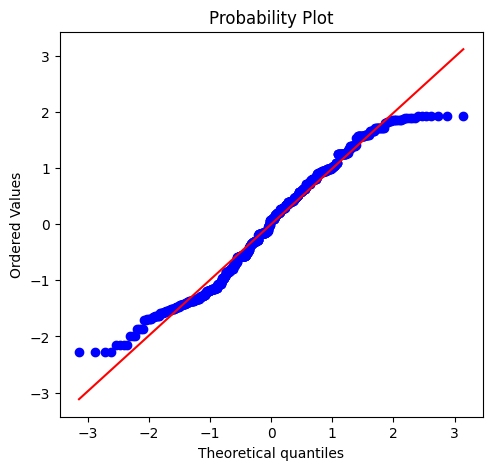

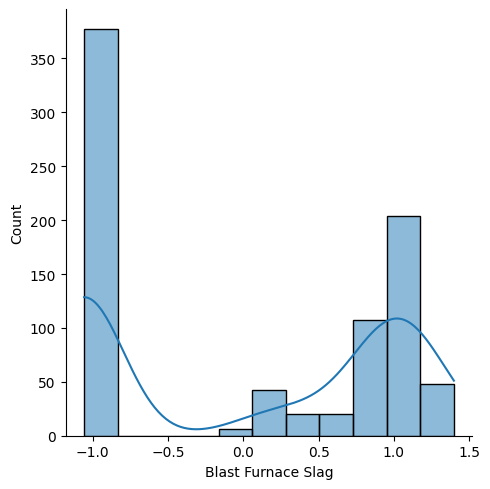

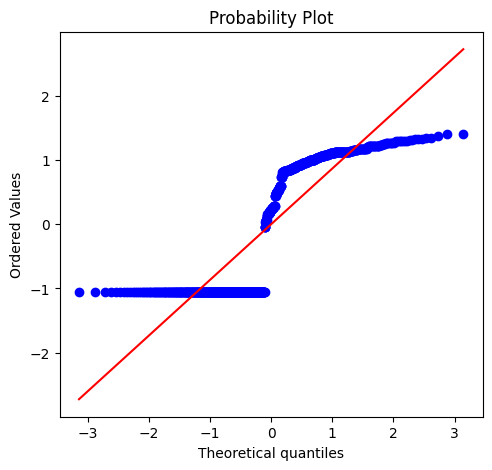

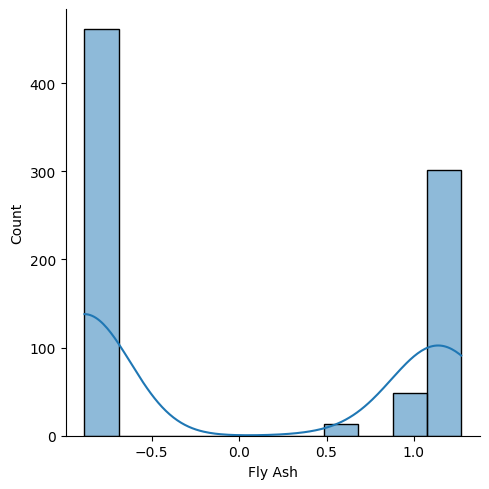

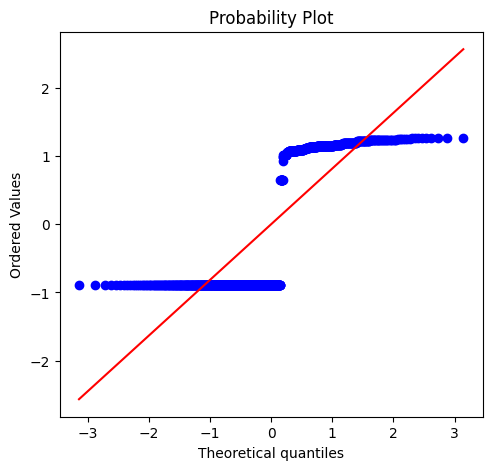

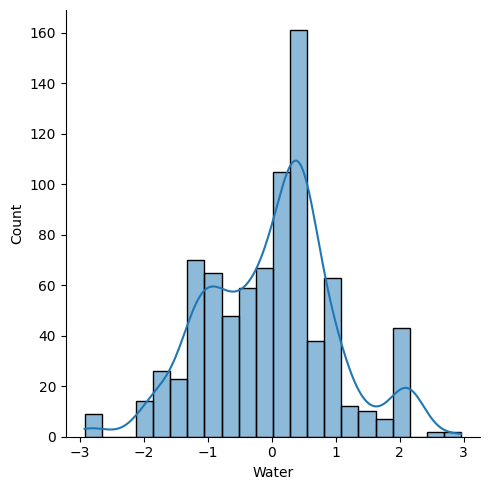

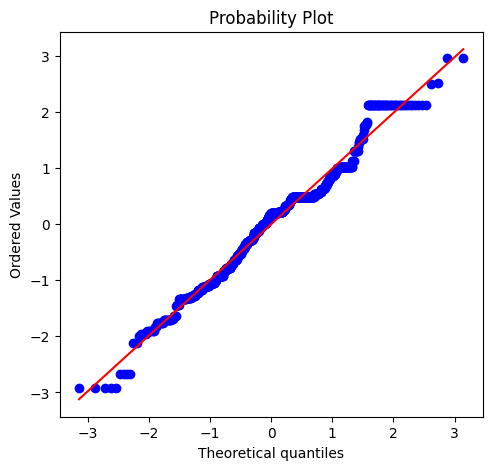

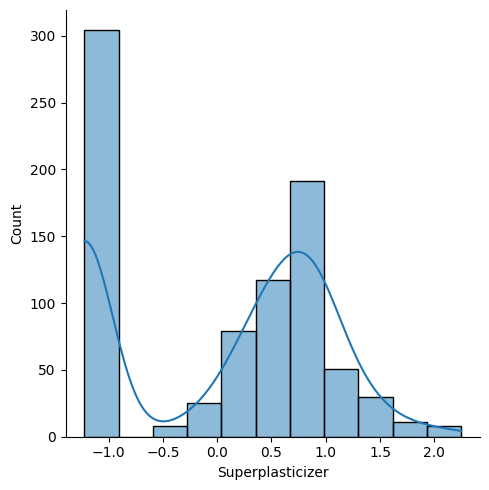

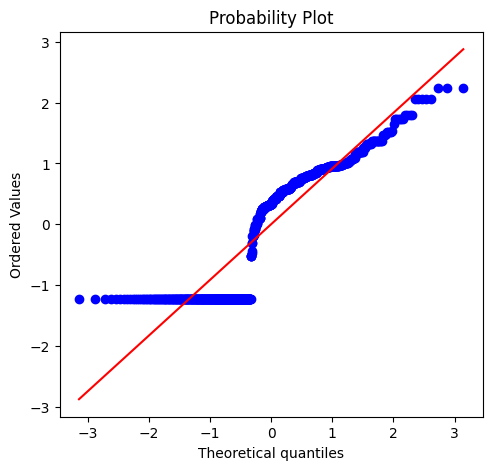

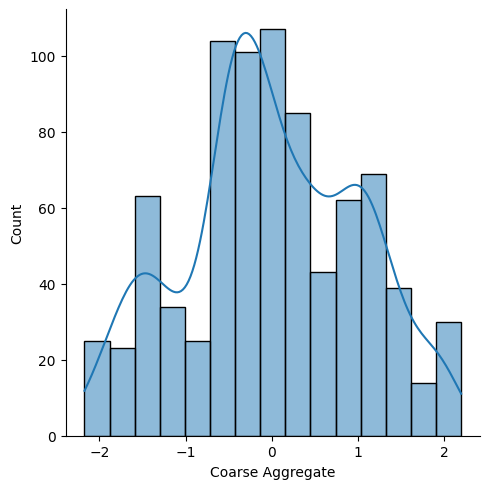

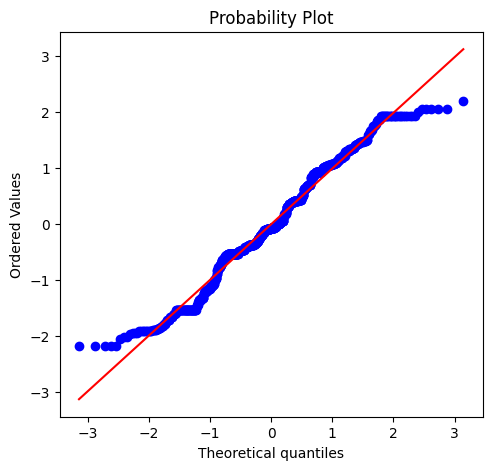

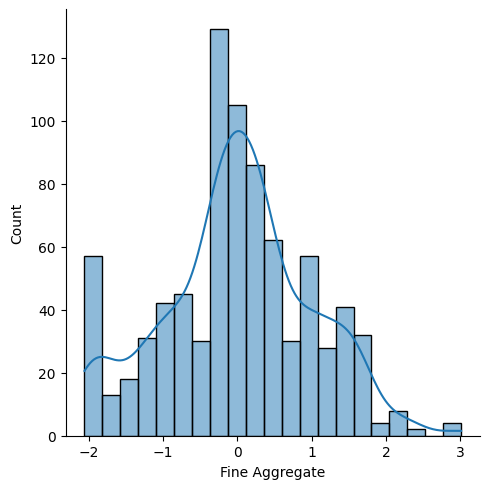

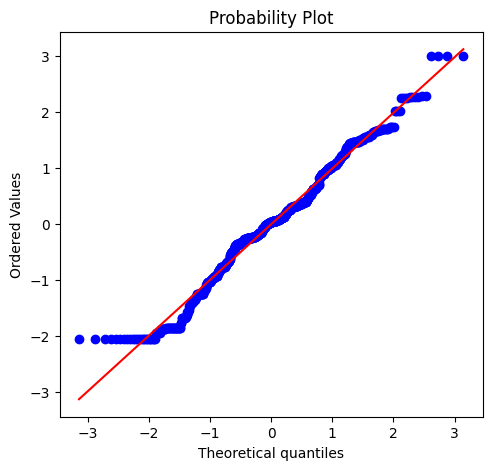

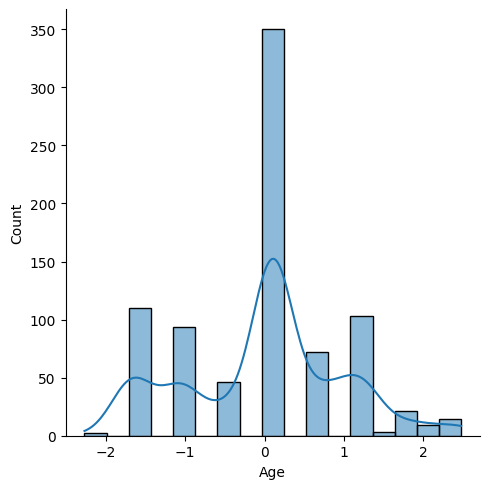

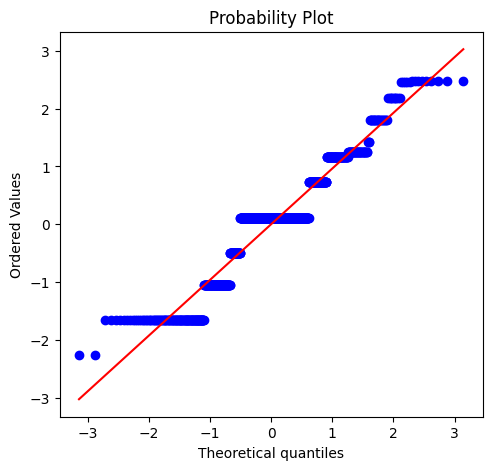

In [89]:
plotTransformColumns(X_train,'yeo-johnson')

In [103]:
def AccuracyScore(X_train,X_test,y_train,y_test):
    lr = LinearRegression()
    lr.fit(X_train,y_train)

    y_pred = lr.predict(X_test)
    print(r2_score(y_test,y_pred))

In [105]:
AccuracyScore(X_train,X_test,y_train,y_test)

0.6275531792314848


In [121]:
def TransformAccuracyScore(X_train,X_test,y_train,y_test,transform):
    pt1 = PowerTransformer(method=transform)

    X_train_transformed = pt1.fit_transform(X_train+0.0000001)
    X_test_transformed = pt1.transform(X_test+0.0000001)
    
    lr = LinearRegression()
    lr.fit(X_train_transformed,y_train)
    
    y_pred = lr.predict(X_test_transformed)
    
    print(r2_score(y_test,y_pred))
    
    print(pd.DataFrame({'cols':X_train.columns,f"{transform}-lambdas":pt1.lambdas_}))

In [123]:
TransformAccuracyScore(X_train,X_test,y_train,y_test,'box-cox')

0.8042534504678884
                 cols  box-cox-lambdas
0              Cement         0.177025
1  Blast Furnace Slag         0.022767
2             Fly Ash        -0.034635
3               Water         0.772682
4    Superplasticizer         0.087141
5    Coarse Aggregate         1.129813
6      Fine Aggregate         1.782018
7                 Age         0.066631


In [125]:
TransformAccuracyScore(X_train,X_test,y_train,y_test,'yeo-johnson')

0.8161906517757739
                 cols  yeo-johnson-lambdas
0              Cement             0.174348
1  Blast Furnace Slag             0.015715
2             Fly Ash            -0.161447
3               Water             0.771307
4    Superplasticizer             0.253935
5    Coarse Aggregate             1.130050
6      Fine Aggregate             1.783100
7                 Age             0.019885
